In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('mnist_train.csv')
df_test = pd.read_csv('mnist_test.csv')

df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
X_train = df.drop(labels=['label'], axis=1)
y_train = df['label']
X_test = df_test.drop(labels=['label'], axis=1)
y_test = df_test['label']

img = X_train.iloc[0].values.reshape(28,28)
img.shape

(28, 28)

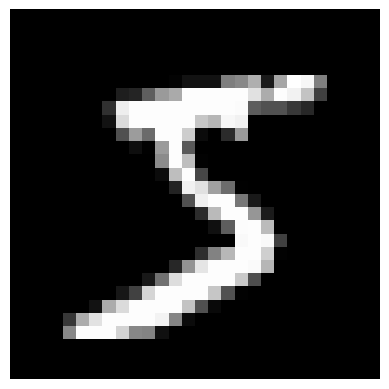

In [4]:
plt.imshow(img, cmap='gray')
plt.axis("off")
plt.show()

In [5]:
X_train = X_train.astype(np.float64) / 255
# y_train = y_train.astype(np.float64) / 255

X_test = X_test.astype(np.float64) / 255
# y_test = y_test.astype(np.float64) / 255

X_train.values.reshape(-1,28,28,1)
X_test.values.reshape(-1,28,28,1)
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [6]:
X_train = X_train.to_numpy().transpose()
y_train = y_train.to_numpy().transpose()

In [7]:
def relu(z):
    return np.maximum(z, [0])

def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=0, keepdims=True))
    return exp_z / np.sum(exp_z, axis=0, keepdims=True)

In [64]:
def hot_encoded_true_label(labels):
    res = np.zeros([labels.size, 10])
    res[np.arange(labels.size), labels] = 1
    return res

def relu_deriv(z):
    return z > 0

def cross_entropy_loss(y, a2):
    y = hot_encoded_true_label(y)
    loss = a2 - y.transpose()
    return loss

In [9]:
epochs = 1000
samples = X_train.shape[0]
n = 0.01
neurons = np.array([16, 10])

In [143]:
# WITHOUT VECTORIZATION

def initialize():
    # w1: (16, 768), b1: (16, 1)
    w1 = np.zeros([neurons[0], samples])
    b1 = np.zeros([neurons[0], 1])

    # w2: (10, 16), b2: (10, 1)
    w2 = np.zeros([neurons[1], neurons[0]])
    b2 = np.zeros([neurons[1], 1])

    return w1, w2, b1, b2

def forward_prop(X, w, b, func):
    z = np.dot(w, X) + b
    a = func(z)
    return z, a

def back_prop(X, y, z1, z2, a1, a2, w1, w2, b1, b2):
    dJ_da2 = 2 * cross_entropy_loss(y, a2)                                       # dJ_da2: (10, 60000)
    da2_dz2 = cross_entropy_loss(y, z2)                                          # da2_dz2: (10, 60000)
    dz2_dw2 = a1                                                                 # dz2_dw2: (16, 60000)
    dz2_da1 = w2                                                                 # dz2_da1: (10, 16)
    dJ_dw2 = (1/samples) * np.dot(dz2_dw2, (da2_dz2 * dJ_da2).transpose()).T     # dJ_dw2: (10, 16)
    dJ_db2 = (1/samples) * (da2_dz2 * dJ_da2)                                    # dJ_db2: (10, 60000)
    dJ_da1 = np.dot(w2.transpose(), dJ_db2)                                      # dJ_da1: (16, 60000)
    da1_dz1 = relu_deriv(z1)                                                     # da1_dz1: (16, 60000)
    dz1_dw1 = X                                                                  # dz1_dw1: (784, 60000)
    dJ_dw1 = dz1_dw1.dot((da1_dz1 * dJ_da1).transpose()).transpose()             # dJ_dw1: (16, 784)
    dJ_db1 = (1/samples) * (da1_dz1 * dJ_da1).sum(axis=1)                        # dJ_db1: (16, 1)
    dJ_db2 = dJ_db2.sum(axis=1)                                                  # dJ_db2 : (10, 1)

    return dJ_dw1, dJ_db1.reshape(16, 1), dJ_dw2, dJ_db2.reshape(10,1)

def gradient_descent(w1, w2, b1, b2, dw1, dw2, db1, db2):
    w1 = w1 - n * dw1
    w2 = w2 - n * dw2
    b1 = b1 - n * db1
    b2 = b2 - n * db2
    
    return w1, b1, w2, b2

In [11]:
def make_predictions():
    pass

def compute_accuracy():
    pass

In [140]:
def run_network(X, y):
    w1, w2, b1, b2 = initialize()

    for i in range(epochs):
        # z1: (16, 60000), a1: (16, 60000), z2: (10, 60000), a2: (10, 60000)
        z1, a1 = forward_prop(X, w1, b1, relu)
        z2, a2 = forward_prop(a1, w2, b2, softmax)
    
        dw1, db1, dw2, db2 = back_prop(X, y, z1, z2, a1, a2, w1, w2, b1, b2)
        w1, b1, w2, b2 = gradient_descent(w1, w2, b1, b2, dw1, dw2, db1, db2)
    
    print(f'w1:{w1.shape}, b1:{b1.shape}, w2:{w2.shape}, b2:{b2.shape}')

    return w1, w2, b1, b2

In [141]:
w1, w2, b1, b2 = run_network(X_train, y_train)

w1:(16, 784), b1:(16, 1), w2:(10, 16), b2:(10, 1)


In [142]:
w1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])